# <span style="color:red"> Lezione 9 </span>

### C++ code

* 9.1  Il codice si basa sulla programmazione ad oggetti:
    - `random.h` oggetto che si occupa della generazioni di numeri random;
    - `funzioni.h` oggetto in cui sono contenuti metodi utili;
    - `Individual.h` oggetto che contiene:
        - `Genis` vector che contiene la sequenza delle città
        - metodi per settare le variabili e i get
        - `Calc_Fitness2_oncirc` che calcola (nonostante il nome) il valore della metrica $L^2$ valutato sul vettore `Genis` (sia sulla circonferenza e sul quadrato);
    - `Population.h` contiene tutti i metodi per la creazione delle nuove generazioni (`Selection`, `New_Generation`, crossover e mutazioni);
    
Alcune funzione di mutazione non sono perfettamente randomiche. Questa scelta è stata fatta con lo scopo di semplificare la programmazione ed evitare eventuali errori:
- `Mutation2` --> lo shift non è di +n dove n è randomico, ma è stato posto uguale a 1
- `Mutation3` --> viene scelto un indice tra (1,26) e permutate le prime cinque città da tale indice con le successive in questo modo: $$1<-->10; 2<-->9; ...; 5<-->6$$

La conseguenza di questa scelta è che l'algoritmo sarà meno ergodico. Per ovviare a ciò si può, però, aumentare il numero di individui (ben consapevole che ciò comporta un costo computazionale maggiore).\
La scelta di non imporre degli early-stop è dettata dal fatto che il programma ha una lenta convergenza e pertanto il valore di best fitness può "ristagnare" per numerose generazioni. Di conseguenza il numero di generazioni è stato scelto dopo una serie di prove che hanno portato migliorare sempre più il `best path`. Per la circonferenza, siccome, mi aspettavo quale fosse il cammino più breve (lungo tutto il bordo) ho aumentato le generazioni fino ad ottenerlo. Non ho potuto fare la stessa cosa per il quadrato, per il quale ho aumentato `generations` fino ad avere un cammino che si incocrociasse, con se stesso, il meno possibile (caso che ho ritenuto fosse il migliore).

La popolazione è generata casualmente e poi tramite la funzione `In_Fitness_order(x,y)` viene riordinata. Quindi il `vector<Individual> individuals` viene ordinato dall'individuo meno fit a quello più fit.

Per la costruzione delle nuove generazioni il processo è (con N individui):\
(1) Prendo i primi N/4 migliori individui (in base al fitness, quindi saranno gli ultimi N/4 individui), passandoli immutati. Questo procedimento è fatto con lo scopo di preservare la migliore parte di popolazione e quindi garantirsi che il fitness del fittest non aumenti.\
(2) Prendo i restanto 3/4 di popolazione e li passo mutantoli (in base alla probabilità) con le 5 possibiltà. L'individuo che si va a far mutare è scelto in modo casuale le mutazioni, mentre per i genitori del crossing over si usa `selection`.\
(Con lo scopo di evitare che la popolazione presenti individui tutti uguali dopo poche generazioni, uso la funzione `Is_new_son` che mi dice se l'individuo mutato è già presente o meno nella nuova generazione e in base a ciò non lo inserisco oppure lo inserisco in essa).\

Tutti gli output di C++ sono contenuti nella directory `data`
- `Cities_config_Circ/Square.0` file che contiene le disposizioni delle città:

1° colonna|2° colonna|3° colonna
----------|----------|----------
num city|x_city|y_city

- `Best_indiv_circ/square.0` file che contiene il migliore percorso (stessa composizione del file precedente)
- `Ave_half_circ/square.0` file che contiene l'andamento della metrica ("fitness"):

1° colonna|2° colonna|
----------|----------|
numero gen|L^2 media su mezza pop|


### Comandi di esecuzione

`./main.exe a` dove `a` è:
* 0 ---> circ
* 1 ---> square

## <span style="color:green"> Esercizio 9.1 </span>

### Python code

Definisco funzioni di lettura e plot.

#### <span style="color:blue">32 cities randomly placed on a circumference</span>

* Cities config

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# config
def read_config(Forma):
    N, X, Y = np.loadtxt("9.1/data/Cities_config_"+Forma+".0", usecols=(0,1,2), delimiter=' ', unpack='true')
    return N, X, Y
def plot_config(Forma):
    N, X, Y = read_config(Forma)
    fig = plt.figure(figsize=(5,5))
    plt.scatter(X, Y, marker='+')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Cities config: '+Forma)
    plt.show()
# best path
def read_best(forma):
    N, X, Y = np.loadtxt("9.1/data/Best_indiv_"+forma+".0", usecols=(0,1,2), delimiter=' ', unpack='true')
    return N, X, Y
def plot_best(forma,Forma):
    fig = plt.figure(figsize=(5,5))
    N, X, Y = read_config(Forma)
    B_city, B_X, B_Y = read_best(forma)
    plt.scatter(X, Y, marker='+', color='green', label='Cities')
    plt.plot(B_X, B_Y,alpha=0.3, label='Best path')
    plt.scatter(B_X[0],B_Y[0],marker='*', color='red', label='First city')
    plt.scatter(B_X[len(X)-1],B_Y[len(X)-1],marker='*', color='black', label='Last city')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Cities config with best path: '+Forma)
    plt.legend(loc=(1,0.767))
    plt.show()
# metric ave
def read_metric(forma):
    N_gene, L2 = np.loadtxt("9.1/data/Ave_half_"+forma+".0", usecols=(0,1), delimiter=' ', unpack='true')
    return N_gene, L2
def plot_L2(forma):
    N_gene, L2 = read_metric(forma)
    fig = plt.figure(figsize=(5,5))
    plt.plot(N_gene, L2)
    plt.xlabel('# gen')
    plt.ylabel('<L^2>')
    plt.title('<L^2> on best half of the population')
    plt.show()
# metric best
def read_metric_best(forma):
    N_gene, L2 = np.loadtxt("9.1/data/L2_"+forma+".0", usecols=(0,1), delimiter=' ', unpack='true')
    return N_gene, L2
def plot_L2_best(forma):
    N_gene, L2 = read_metric_best(forma)
    fig = plt.figure(figsize=(5,5))
    plt.plot(N_gene, L2)
    plt.xlabel('# gen')
    plt.ylabel('L^2')
    plt.title('L^2 best path')
    plt.show()

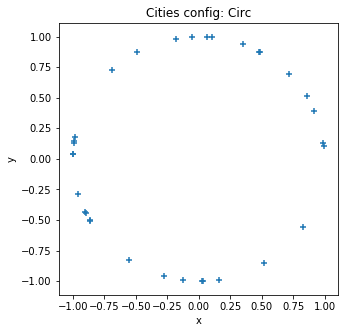

In [10]:
plot_config("Circ")

* Best path

2000 individui con 1200 generazioni

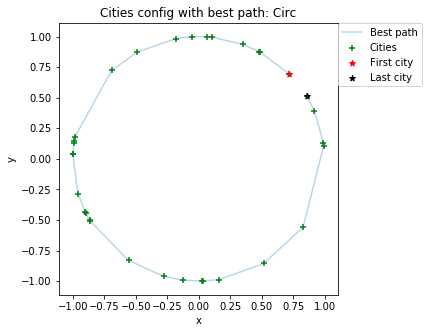

In [11]:
plot_best("circ","Circ")

* $\langle L^{(2)}\rangle$ averaged on the best half of the population

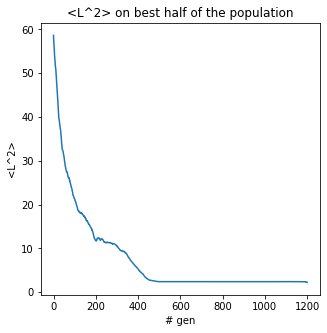

In [12]:
plot_L2("circ")

* $L^{(2)}$ of the best path in each gen

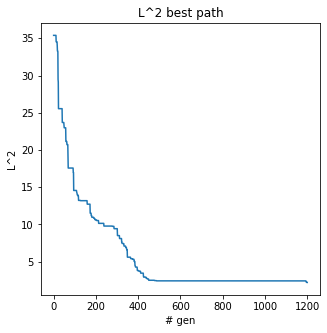

In [13]:
plot_L2_best("circ")

#### <span style="color:blue">32 cities randomly placed inside a square</span>

* Cities config

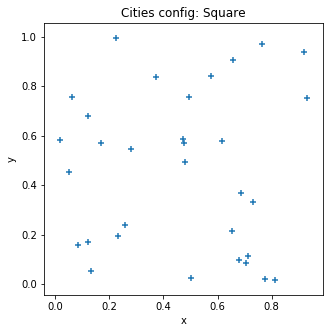

In [14]:
plot_config("Square")

* Best path

5000 individui con 800 generazioni

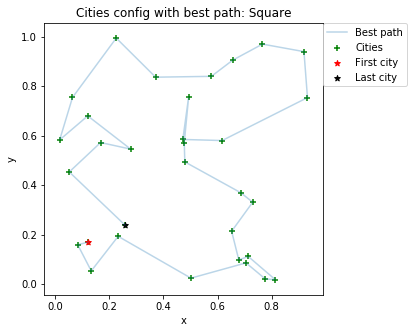

In [15]:
plot_best("square","Square")

* $\langle L^{(2)}\rangle$ averaged on the best half of the population

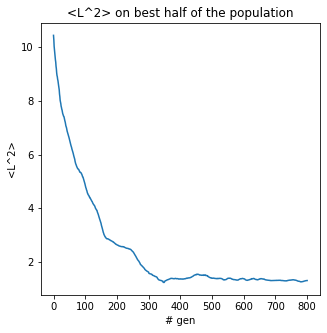

In [16]:
plot_L2("square")

* $L^{(2)}$ of the best path in each gen

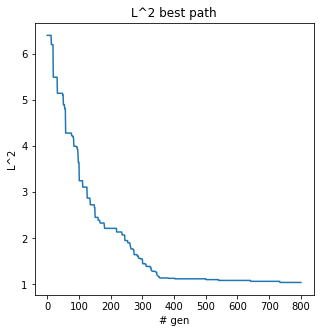

In [17]:
plot_L2_best("square")